#### Deforestation in the Brazilian Legal Amazon.
##### Years: 2008 to 2019.
##### Data source: National Institute for Space Research (http://terrabrasilis.dpi.inpe.br/app/dashboard/deforestation/biomes/legal_amazon/increments)
##### I used this database to develop the final evaluation of the Applied Plotting, Charting & Data Representation in Python course, part of the Applied Data Science with Python specialization, offered by the University of Michigan / Coursera.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_ind = pd.read_csv('LegalAmazon_IndigenousProtectedAreas.csv', delimiter=";")
df_uc = pd.read_csv('LegalAmazon_ConservationUnits.csv', delimiter=";")
df_ct = pd.read_csv('LegalAmazon_Counties.csv', delimiter=";")
df_st = pd.read_csv('LegalAmazon_States.csv', delimiter=";")
dfs = [df_ind, df_uc, df_ct, df_st]
amazon_type = ['IndigAreas','ConsUnits','Counties','States']

In [3]:
# Creating columns for the percentage increases/decreases of new deforested areas (compared to the previous year).
i = 0
for df in dfs:
    df['incr'] = 0
    df.rename(columns=lambda x: x+'_'+amazon_type[i] if x in ('area km²', 'incr') else x, inplace=True)
    i += 1

In [4]:
from functools import reduce

df = reduce(lambda left,right: pd.merge(left,right,on='year',how='outer'), dfs)

df.head()

,year,area km²_IndigAreas,incr_IndigAreas,area km²_ConsUnits,incr_ConsUnits,area km²_Counties,incr_Counties,area km²_States,incr_States
0,2008,"445,99",0,"813,92",0,"13.293,80",0,"13.295,29",0
1,2009,"331,19",0,"578,83",0,"6.305,98",0,"6.306,72",0
2,2010,"293,75",0,"521,71",0,"6.287,85",0,"6.288,63",0
3,2011,"225,69",0,"356,50",0,"5.688,03",0,"5.688,73",0
4,2012,"159,04",0,"336,24",0,"4.427,35",0,"4.427,70",0


In [5]:
for col in list(range(1,9,2)):
    for row in df.index:
        df.iloc[row,col] = df.iloc[row,col].replace('.','').replace(',','.')

In [6]:
df = df.astype(float)
df['year'] = df['year'].astype(int)

print(df.dtypes)

df.head()

year                     int64
area km²_IndigAreas    float64
incr_IndigAreas        float64
area km²_ConsUnits     float64
incr_ConsUnits         float64
area km²_Counties      float64
incr_Counties          float64
area km²_States        float64
incr_States            float64
dtype: object


,year,area km²_IndigAreas,incr_IndigAreas,area km²_ConsUnits,incr_ConsUnits,area km²_Counties,incr_Counties,area km²_States,incr_States
0,2008,445.99,0.0,813.92,0.0,13293.80,0.0,13295.29,0.0
1,2009,331.19,0.0,578.83,0.0,6305.98,0.0,6306.72,0.0
2,2010,293.75,0.0,521.71,0.0,6287.85,0.0,6288.63,0.0
3,2011,225.69,0.0,356.50,0.0,5688.03,0.0,5688.73,0.0
4,2012,159.04,0.0,336.24,0.0,4427.35,0.0,4427.70,0.0


In [7]:
# Calculating percentage increases/decreases of new deforested areas (compared to the previous year).
for col in list(range(2,9,2)):
    for row in range(1,len(df)):
        df.iloc[row,col] = ((df.iloc[row,col-1] - df.iloc[row-1,col-1]) / df.iloc[row-1,col-1])*100
df.head()

,year,area km²_IndigAreas,incr_IndigAreas,area km²_ConsUnits,incr_ConsUnits,area km²_Counties,incr_Counties,area km²_States,incr_States
0,2008,445.99,0.000000,813.92,0.000000,13293.80,0.000000,13295.29,0.000000
1,2009,331.19,-25.740487,578.83,-28.883674,6305.98,-52.564504,6306.72,-52.564254
2,2010,293.75,-11.304689,521.71,-9.868182,6287.85,-0.287505,6288.63,-0.286837
3,2011,225.69,-23.169362,356.50,-31.667018,5688.03,-9.539350,5688.73,-9.539439
4,2012,159.04,-29.531658,336.24,-5.683029,4427.35,-22.163737,4427.70,-22.167162


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

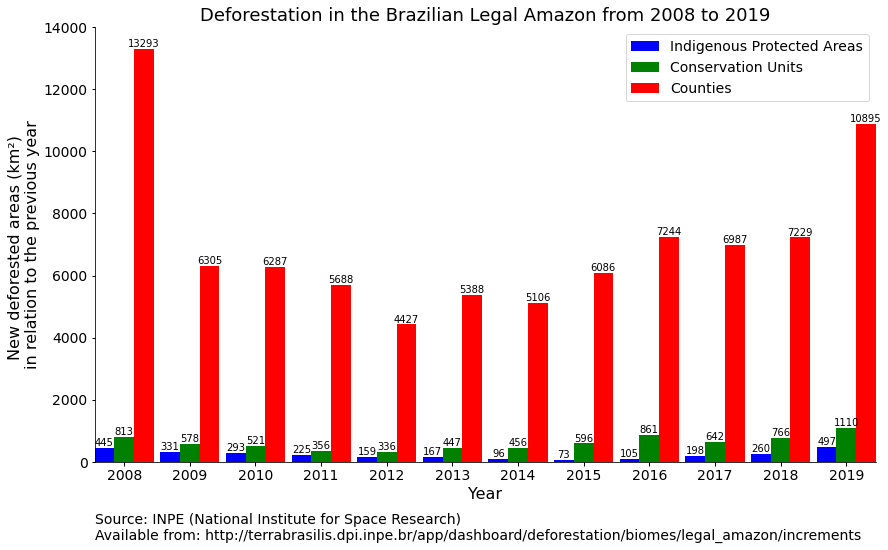

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

plt.figure(figsize=(14,8))

plt.bar(df['year']-0.3, df['area km²_IndigAreas'], 
        color='blue', width=0.3, label='Indigenous Protected Areas')
plt.bar(df['year'], df['area km²_ConsUnits'], 
        color='green', width=0.3, label='Conservation Units')
plt.bar(df['year']+0.3, df['area km²_Counties'], 
        color='red', width=0.3, label='Counties')

ax = plt.gca()

ax.set_xlim(2007.55,2019.45)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylim(0,14000)
ax.set_ylabel('''New deforested areas (km²) 
in relation to the previous year''', fontsize=16)

ax.set_title('''Deforestation in the Brazilian \
Legal Amazon from 2008 to 2019''', fontsize=18)

ax.legend(loc='upper right', fontsize=14)

ax.tick_params(labelsize=14, width=1)
plt.xticks(np.arange(2008, 2020, step=1), fontsize=14)

txt='''Source: INPE (National Institute for Space Research)
Available from: http://terrabrasilis.dpi.inpe.br/app/\
dashboard/deforestation/biomes/legal_amazon/increments'''
plt.text(2007.55, -2500, txt, ha='left', fontsize=14)

for rect in ax.patches:
    height = rect.get_height()
    ypos = rect.get_y() + height
    ax.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % int(height), ha='center', va='bottom')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig('graphic4.png', bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

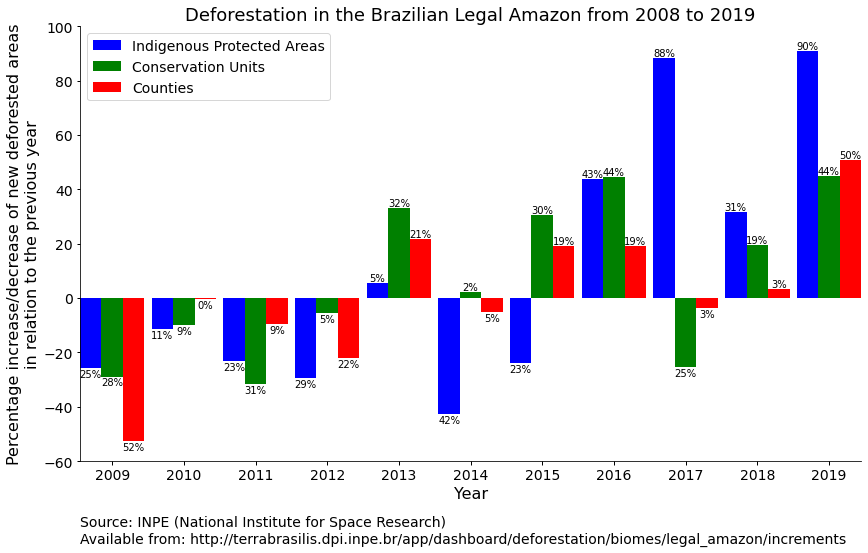

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

plt.figure(figsize=(14,8))

plt.bar(df.loc[1:12,'year']-0.3, df.loc[1:12,'incr_IndigAreas'], 
        color='blue', width=0.3, label='Indigenous Protected Areas')
plt.bar(df.loc[1:12,'year'], df.loc[1:12,'incr_ConsUnits'], 
        color='green', width=0.3, label='Conservation Units')
plt.bar(df.loc[1:12,'year']+0.3, df.loc[1:12,'incr_Counties'], 
        color='red', width=0.3, label='Counties')

ax = plt.gca()

ax.set_xlim(2008.55,2019.45)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylim(-60,100)
ax.set_ylabel('''Percentage increase/decrease of new deforested areas
in relation to the previous year''', fontsize=16)

ax.set_title('Deforestation in the Brazilian \
Legal Amazon from 2008 to 2019', fontsize=18)

ax.legend(loc='upper left', fontsize=14)

ax.tick_params(labelsize=14, width=1)
plt.xticks(np.arange(2009, 2020, step=1), fontsize=14)

txt='''Source: INPE (National Institute for Space Research)
Available from: http://terrabrasilis.dpi.inpe.br/app/\
dashboard/deforestation/biomes/legal_amazon/increments'''
plt.text(2008.55, -90, txt, ha='left', fontsize=14)

for rect in ax.patches:
    height = rect.get_height()
    ypos = rect.get_y() + height if height >= 0 else rect.get_y() + height - 4
    ax.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % abs(int(height)) + '%', ha='center', va='bottom')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig('graphic2.png', bbox_inches='tight')

plt.show()